In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
chart_df = pd.read_pickle('NLP_df.pkl')
gdp_df = pd.read_csv('GDP.csv')

In [2]:
chart_df['chart_date'] = pd.to_datetime(chart_df.chart_date)
chart_df['date'] = chart_df.chart_date

In [3]:
gdp_df['DATE'] = pd.to_datetime(gdp_df.DATE)
gdp_df['date'] = gdp_df.DATE

In [4]:
chart_df = chart_df.merge(right = pd.read_pickle('Hot100'),how='right',on='song_id').dropna()
chart_df


,chart_position_x,chart_date_x,song_x,performer_x,song_id,instance_x,time_on_chart_x,consecutive_weeks_x,previous_week_x,peak_position_x,...,song_y,performer_y,instance_y,time_on_chart_y,consecutive_weeks_y,previous_week_y,peak_position_y,worst_position_y,chart_debut_y,chart_url_y
0,74.0,1958-08-02,Gotta-Have-Rain,Eydie-Gorme,Gotta Have RainEydie Gorme,1.0,1.0,0.0,0.0,74.0,...,Gotta Have Rain,Eydie Gorme,1,1,0,0,74,74,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...
1,18.0,1958-08-02,Little Star,The Elegants,Little StarThe Elegants,1.0,1.0,0.0,0.0,18.0,...,Little Star,The Elegants,1,1,0,0,18,18,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...
2,61.0,1958-08-02,Itchy Twitchy Feeling,Bobby Hendricks,Itchy Twitchy FeelingBobby Hendricks,1.0,1.0,0.0,0.0,61.0,...,Itchy Twitchy Feeling,Bobby Hendricks,1,1,0,0,61,61,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...
3,52.0,1958-08-02,Early In The Morning,The Rinky-Dinks,Early In The MorningThe Rinky-Dinks,1.0,1.0,0.0,0.0,52.0,...,Early In The Morning,The Rinky-Dinks,1,1,0,0,52,52,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...
4,94.0,1958-08-02,She Was Only Seventeen (He Was One Year More),Marty Robbins,She Was Only Seventeen (He Was One Year More)M...,1.0,1.0,0.0,0.0,94.0,...,She Was Only Seventeen (He Was One Year More),Marty Robbins,1,1,0,0,94,94,1958-08-02,https://www.billboard.com/charts/hot-100/1958-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335186,3.0,2022-10-08,Unholy,Sam Smith & Kim Petras,UnholySam Smith & Kim Petras,1.0,1.0,0.0,0.0,3.0,...,Unholy,Sam Smith & Kim Petras,1,3,2,2,2,3,2022-10-08,https://www.billboard.com/charts/hot-100/2022-...
335187,86.0,2022-07-23,Last Last,Burna Boy,Last LastBurna Boy,1.0,1.0,0.0,0.0,86.0,...,Last Last,Burna Boy,1,14,13,44,44,86,2022-07-23,https://www.billboard.com/charts/hot-100/2022-...
335190,83.0,2022-08-13,Victoria’s Secret,Jax,Victoria’s SecretJax,1.0,1.0,0.0,0.0,83.0,...,Victoria’s Secret,Jax,1,11,10,38,35,83,2022-08-13,https://www.billboard.com/charts/hot-100/2022-...
335191,99.0,2022-04-30,Fall In Love,Bailey Zimmerman,Fall In LoveBailey Zimmerman,1.0,1.0,0.0,0.0,99.0,...,Fall In Love,Bailey Zimmerman,3,24,21,29,29,99,2022-04-30,https://www.billboard.com/charts/hot-100/2022-...


In [5]:
chart_df.set_index('date',inplace=True)

In [6]:
chart_df = chart_df.groupby(pd.Grouper(freq='M')).mean().reset_index()[['date','sentiment']]

In [7]:
chart_df['date'] = chart_df['date'] + pd.DateOffset(1)

In [8]:
chart_df

,date,sentiment
0,1958-09-01,0.169755
1,1958-10-01,0.196548
2,1958-11-01,0.204485
3,1958-12-01,0.177540
4,1959-01-01,0.186635
...,...,...
766,2022-07-01,0.125863
767,2022-08-01,0.045380
768,2022-09-01,0.012304
769,2022-10-01,-0.001674


In [9]:
df = chart_df.merge(right = gdp_df, how='outer')

In [10]:
df

,date,sentiment,DATE,GDP
0,1958-09-01,0.169755,NaT,NaN
1,1958-10-01,0.196548,1958-10-01,17486.0
2,1958-11-01,0.204485,NaT,NaN
3,1958-12-01,0.177540,NaT,NaN
4,1959-01-01,0.186635,1959-01-01,17745.0
...,...,...,...,...
813,1957-07-01,NaN,1957-07-01,17578.0
814,1957-10-01,NaN,1957-10-01,17317.0
815,1958-01-01,NaN,1958-01-01,16805.0
816,1958-04-01,NaN,1958-04-01,16850.0


In [11]:
df.drop(columns=['DATE'],inplace=True)

In [12]:
df.set_index('date',inplace=True)

In [13]:
# df['sentiment'] = df.sentiment.shift(1)

In [14]:
df = df.sort_values(by='date')
df['GDP_interp'] = df.GDP.astype('float').interpolate(method='time')

In [15]:
# df = df.iloc[1:]

In [16]:
df.drop(columns=['GDP'],inplace=True)

<AxesSubplot:xlabel='date'>

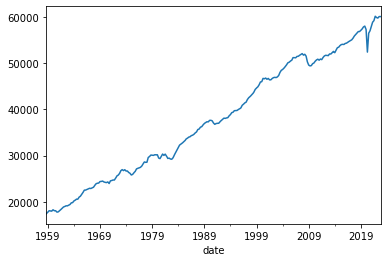

In [17]:
df.dropna(inplace=True)
df.GDP_interp.plot()

<AxesSubplot:xlabel='date'>

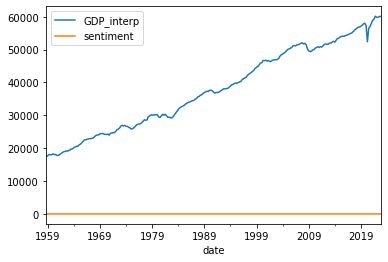

In [18]:
df.plot.line(y=['GDP_interp','sentiment'])

In [19]:
# df.reset_index(inplace=True)
# df.set_index('chart_date',inplace=True,drop=False)

In [20]:
# df.drop(columns=
#        ['chart_position', 'song', 'performer', 'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
#        'peak_position', 'worst_position', 'chart_debut', 'chart_url'],inplace=True
#        )
# df.info()

In [21]:
df

,sentiment,GDP_interp
date,,
1958-09-01,0.169755,17381.652174
1958-10-01,0.196548,17486.000000
1958-11-01,0.204485,17573.271739
1958-12-01,0.177540,17657.728261
1959-01-01,0.186635,17745.000000
...,...,...
2022-07-01,0.125863,60082.000000
2022-08-01,0.045380,60082.000000
2022-09-01,0.012304,60082.000000


In [22]:
agg_df = df
agg_df['chart_date'] = agg_df.index

In [23]:
agg_df

,sentiment,GDP_interp,chart_date
date,,,
1958-09-01,0.169755,17381.652174,1958-09-01
1958-10-01,0.196548,17486.000000,1958-10-01
1958-11-01,0.204485,17573.271739,1958-11-01
1958-12-01,0.177540,17657.728261,1958-12-01
1959-01-01,0.186635,17745.000000,1959-01-01
...,...,...,...
2022-07-01,0.125863,60082.000000,2022-07-01
2022-08-01,0.045380,60082.000000,2022-08-01
2022-09-01,0.012304,60082.000000,2022-09-01


''

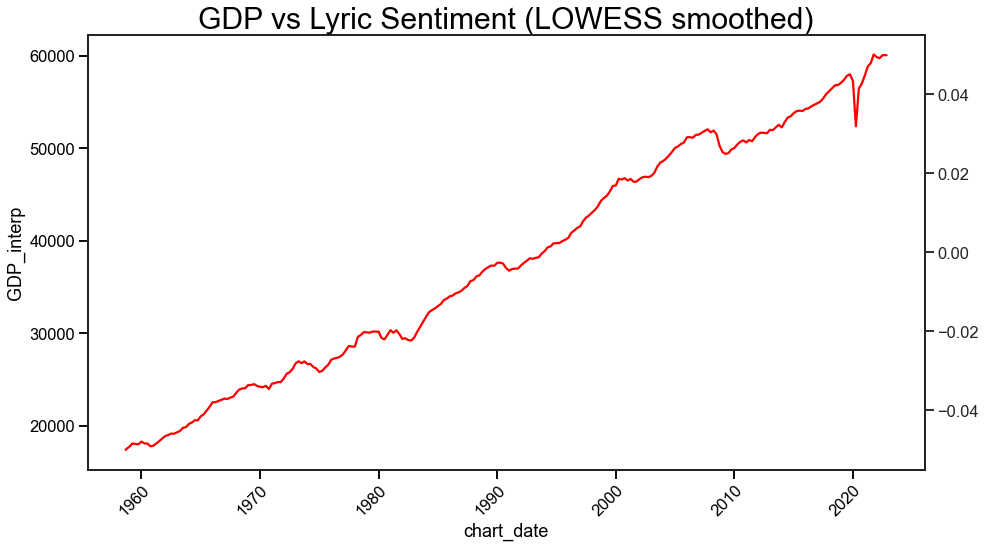

In [24]:
from loess.loess_1d import loess_1d
data = agg_df
data['rolling_sentiment'] = data.sentiment.rolling(center=True,window=26).mean()

xin = data.chart_date.astype('int64')/100000000000
yin = data['sentiment']
xout, yout, wout = loess_1d(xin.astype('int32').values, yin.values, degree=1, frac=0.2)
data['lowess_sentiment'] = pd.Series(yout)
x = 'chart_date'
data['GDP_diff'] = data['GDP_interp'].diff()#.rolling(center=True,window=26,closed='both',win_type='barthann',min_periods=1).mean()
y = 'GDP_diff'
y1='GDP_interp'
title_size = 30
label_size = 15
y2 = 'sentiment'
y3 = 'lowess_sentiment'

sns.set_context("talk")
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.lineplot(ax=ax, data=data, x=x, y=y1, color='r')
ax2 = plt.twinx()
q = sns.lineplot(ax=ax2, data=data, x=x, y=y3)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

# p.set_xlabel('String',fontsize=label_size)
# p.set_ylabel('String',fontsize=label_size)
p.set_title('GDP vs Lyric Sentiment (LOWESS smoothed)',fontsize=title_size)
;

''

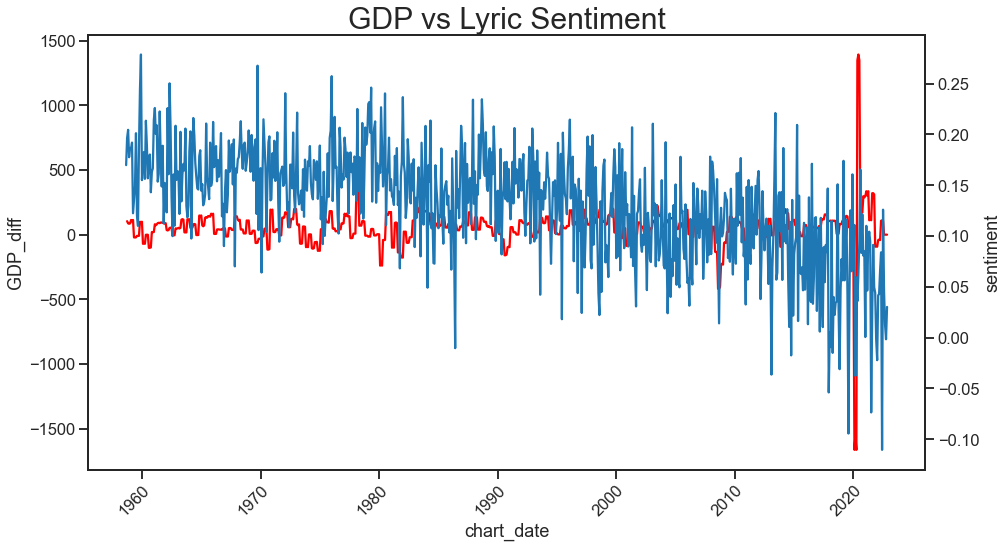

In [25]:
fig, ax=plt.subplots(figsize=(15,8))
sns.set_style("ticks")
p = sns.lineplot(ax=ax, data=data, x=x, y=y,color='r')
ax2 = plt.twinx()
r = sns.lineplot(ax=ax2, data=data, x=x, y=y2)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

# p.set_xlabel('String',fontsize=label_size)
# p.set_ylabel('String',fontsize=label_size)
p.set_title('GDP vs Lyric Sentiment',fontsize=title_size)
;

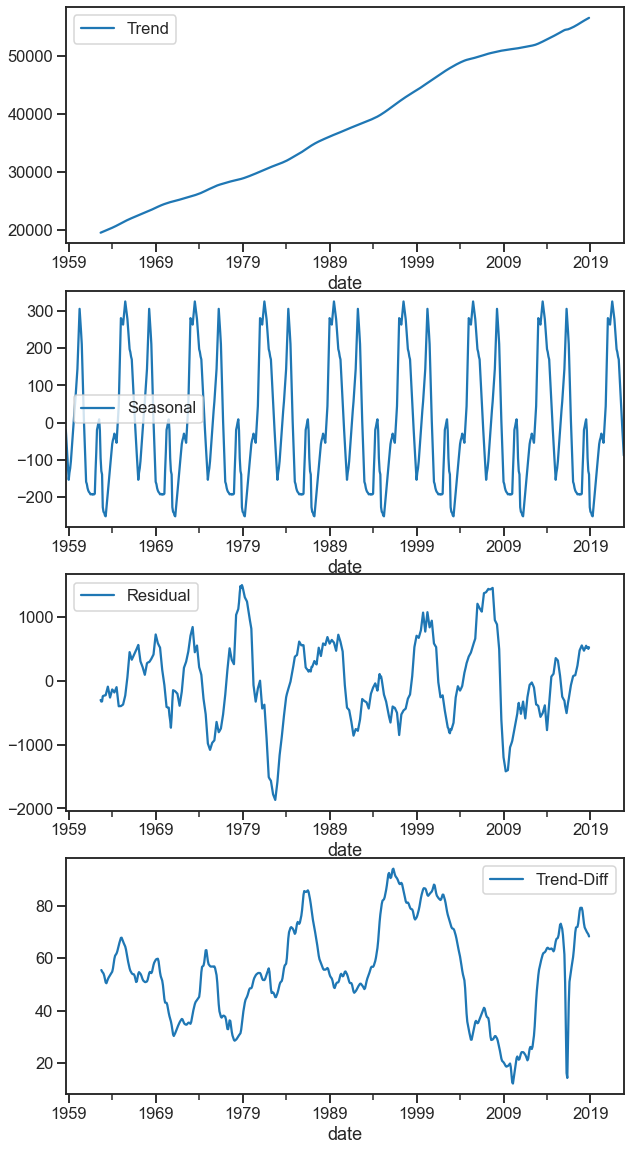

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
datasource = data['GDP_interp'] ## your dataframe here
period =  96 ## size of window for running-mean smoothing
result = seasonal_decompose(datasource, period = period)
fig, ax = plt.subplots(4,1, figsize = (10,20))
result.trend.plot(ax = ax[0], label = 'Trend')
ax[0].legend()
result.seasonal.plot(ax = ax[1], label = 'Seasonal')
ax[1].legend()
result.resid.plot(ax = ax[2], label = 'Residual')
ax[2].legend()
result.trend.diff().plot(ax = ax[3], label='Trend-Diff')
ax[3].legend();

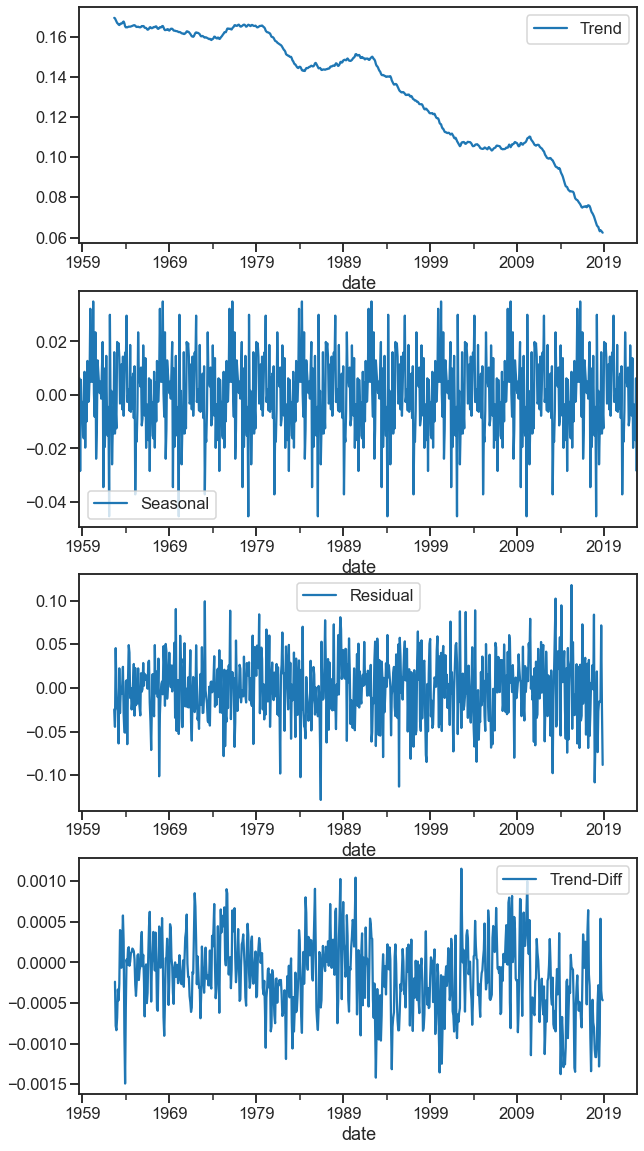

In [27]:
datasource = data['sentiment'] ## your dataframe here
period =  96 ## size of window for running-mean smoothing
result = seasonal_decompose(datasource, period = period)
fig, ax = plt.subplots(4,1, figsize = (10,20))
result.trend.plot(ax = ax[0], label = 'Trend')
ax[0].legend()
result.seasonal.plot(ax = ax[1], label = 'Seasonal')
ax[1].legend()
result.resid.plot(ax = ax[2], label = 'Residual')
ax[2].legend()
result.trend.diff().plot(ax = ax[3], label='Trend-Diff')
ax[3].legend();

In [28]:
export_df = agg_df.drop(columns=['rolling_sentiment','lowess_sentiment','GDP_diff'])
export_df.to_pickle('model_df.pkl')

In [29]:
export_df

,sentiment,GDP_interp,chart_date
date,,,
1958-09-01,0.169755,17381.652174,1958-09-01
1958-10-01,0.196548,17486.000000,1958-10-01
1958-11-01,0.204485,17573.271739,1958-11-01
1958-12-01,0.177540,17657.728261,1958-12-01
1959-01-01,0.186635,17745.000000,1959-01-01
...,...,...,...
2022-07-01,0.125863,60082.000000,2022-07-01
2022-08-01,0.045380,60082.000000,2022-08-01
2022-09-01,0.012304,60082.000000,2022-09-01


<AxesSubplot:xlabel='date'>

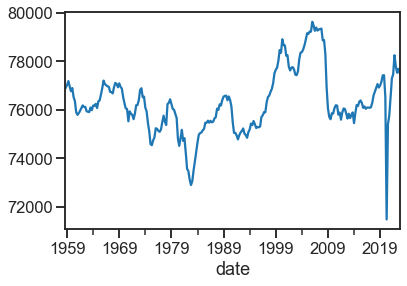

In [30]:
export_df['week_num'] = np.linspace(60082.000000/1.01,17381.652174,771)
export_df['GDP_Stat'] = export_df.GDP_interp + export_df.week_num
export_df.GDP_Stat.plot()

In [33]:
from pandas.plotting import autocorrelation_plot
series = export_df.GDP

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

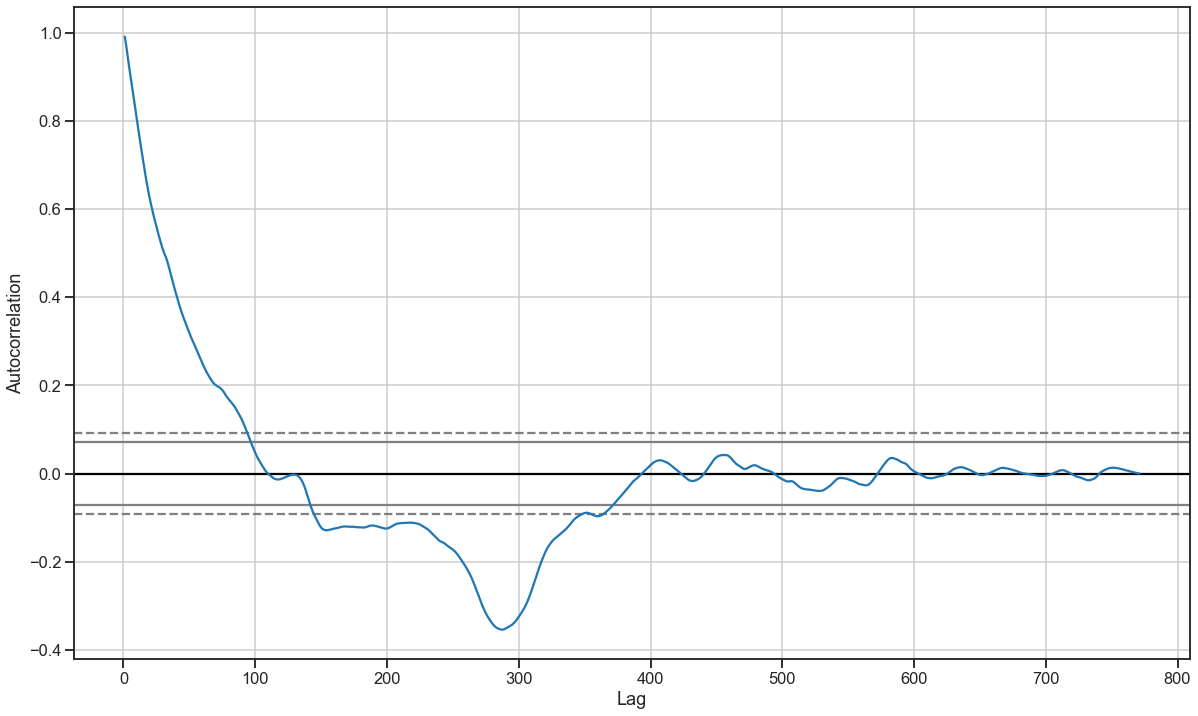

In [34]:
fig, ax = plt.subplots(figsize = (20,12))
autocorrelation_plot(series,ax=ax)